In [ ]:
from google.colab import drive #Dataset mounted from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/realtimedata1.csv"

In [ ]:
import numpy as np
import pandas as pd # Used pandas for data manipulation, analysis and cleaning
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import re
import bs4
import requests
import spacy
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
from spacy.matcher import Matcher
from spacy.tokens import Span 
import networkx as nx
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
datasentiment = pd.read_csv(path)

In [ ]:
datasentiment 

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,i went to my sisters yesterday. my dad came to pick me up early in the morning cause i had tuition so i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,"My class just started but I had one class Although it was an early class,it was really interesting and I had fun.",Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,"I just woke up so I'm not sure how my mood for today is yet, but I hope I'll be happy and not think about the embarrassing past.",Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,Exam is after 7 days but due to online classes the classes was not effective so stressed out how to give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,It was good so far. I have my nieces over here so it’s gonna be fun. \nBut i have a throat ache that’s bothering me. \nIt is so annoying as i wanted to spend a good time with my nieces considering...,Listen to music
5,2021/03/28 9:59:13 pm GMT-6,18-24 years old,Female,Student,Happy,Today I am feeling good and productive! There were many work that were piling up for couple of days as I wasn't feeling for it but I got to work on those so it feels great. And also as I didn't p...,Listen to podcast
6,2021/03/28 10:06:38 pm GMT-6,18-24 years old,Male,Student,Happy,I am having a really good day. There are alot of task to perform today but i am energized to complete all the task. After a long time I started writing and it feels amazing.,Listen to music
7,2021/03/28 10:39:01 pm GMT-6,18-24 years old,Female,Student,Anxious,Nothing special. A quite sunny Monday. I plan to buy a schedule book so that I can organize and plan better.,Doing nothing
8,2021/03/28 10:42:23 pm GMT-6,18-24 years old,Female,Student,Anxious,I planned on studying for cpsc 261 all day but after 3.5 hours I decided to take a break and go to the mall. I bumped into an old friend when I went to Champs. Turns out she works there and she go...,Other
9,2021/03/28 10:43:18 pm GMT-6,18-24 years old,Male,Student,Sad,"I went out for groceries because it was sunny. Instead of taking the bus, I walked to the store to enjoy the sun. It was all rainbows and sunshine until the wind and rain came out of nowhere. On t...",Read a book


In [ ]:
datasentiment.info() # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Timestamp                                    59 non-null     object
 1   How old are you?                             59 non-null     object
 2   What is your gender?                         59 non-null     object
 3   What is your occupation?                     59 non-null     object
 4   How are you feeling today?                   59 non-null     object
 5   Text                                         59 non-null     object
 6   Which activity would make your day better?   59 non-null     object
dtypes: object(7)
memory usage: 3.4+ KB


In [ ]:
datasentiment.head()  #observing top 5 rows of the dataset

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,i went to my sisters yesterday. my dad came to pick me up early in the morning cause i had tuition so i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,"My class just started but I had one class Although it was an early class,it was really interesting and I had fun.",Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,"I just woke up so I'm not sure how my mood for today is yet, but I hope I'll be happy and not think about the embarrassing past.",Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,Exam is after 7 days but due to online classes the classes was not effective so stressed out how to give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,It was good so far. I have my nieces over here so it’s gonna be fun. \nBut i have a throat ache that’s bothering me. \nIt is so annoying as i wanted to spend a good time with my nieces considering...,Listen to music


In [ ]:
datasentiment.tail() #observing bottom 5 rows of the dataset


,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
54,2021/04/03 11:00:12 am GMT-6,18-24 years old,Female,Student,Happy,"I planned to study for math and this course today, but I wasted a lot of time and haven't get down to the work till late afternoon, at that time I was anxious because I am afraid that I couldn't f...",Play a game
55,2021/04/03 7:58:20 pm GMT-6,18-24 years old,Male,Student,Happy,My day was quite decent as I was able to sleep in and get ample rest. After eating lunch I became very tired and found it hard to finish my assignments. However that did not really affect my mood...,Play a game
56,2021/04/03 8:00:29 pm GMT-6,18-24 years old,Male,Student,Happy,"It was a good sunny day. Woke up and decided to watch some netflix since I have no upcoming midterms or finals. After I finished an episode, I decided to start watching some of the lectures that I...",Play a game
57,2021/04/04 1:13:35 pm GMT-6,18-24 years old,Male,Student,Anxious,My day has been okay just been starting my assignments and such. Yesterday I went out with friends for a long time and that made me feel better because of just school things. Finals are coming up ...,Play a game
58,2021/04/05 3:37:14 am GMT-6,18-24 years old,Female,Student,Anxious,I went biking today with my boyfriend. I've been feeling anxious because I keep getting nervous that I may have cardiac disease.,Play a game


In [ ]:
datasentiment.shape 

(59, 7)

In [ ]:
def remove_punctuation(text): #function for removing punctuation
    import string 
    translator = str.maketrans('', '', string.punctuation) #replace the punctuations with no space
    return text.translate(translator)

In [ ]:
datasentiment['Text'] = datasentiment['Text'].apply(remove_punctuation)
datasentiment.head(10) #observing first 10 rows to confirm punctuation removal

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,i went to my sisters yesterday my dad came to pick me up early in the morning cause i had tuition so i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,My class just started but I had one class Although it was an early classit was really interesting and I had fun,Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,I just woke up so Im not sure how my mood for today is yet but I hope Ill be happy and not think about the embarrassing past,Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,Exam is after 7 days but due to online classes the classes was not effective so stressed out how to give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,It was good so far I have my nieces over here so it’s gonna be fun \nBut i have a throat ache that’s bothering me \nIt is so annoying as i wanted to spend a good time with my nieces considering th...,Listen to music
5,2021/03/28 9:59:13 pm GMT-6,18-24 years old,Female,Student,Happy,Today I am feeling good and productive There were many work that were piling up for couple of days as I wasnt feeling for it but I got to work on those so it feels great And also as I didnt procr...,Listen to podcast
6,2021/03/28 10:06:38 pm GMT-6,18-24 years old,Male,Student,Happy,I am having a really good day There are alot of task to perform today but i am energized to complete all the task After a long time I started writing and it feels amazing,Listen to music
7,2021/03/28 10:39:01 pm GMT-6,18-24 years old,Female,Student,Anxious,Nothing special A quite sunny Monday I plan to buy a schedule book so that I can organize and plan better,Doing nothing
8,2021/03/28 10:42:23 pm GMT-6,18-24 years old,Female,Student,Anxious,I planned on studying for cpsc 261 all day but after 35 hours I decided to take a break and go to the mall I bumped into an old friend when I went to Champs Turns out she works there and she got m...,Other
9,2021/03/28 10:43:18 pm GMT-6,18-24 years old,Male,Student,Sad,I went out for groceries because it was sunny Instead of taking the bus I walked to the store to enjoy the sun It was all rainbows and sunshine until the wind and rain came out of nowhere On the w...,Read a book


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english') 
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw] # removing the stop words and lowercasing the selected words
    return " ".join(text) 

In [ ]:
datasentiment['Text'] = datasentiment['Text'].apply(stopwords)
datasentiment.head(10) #observing first 10 rows to confirm stopwords are removed


,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,went sisters yesterday dad came pick early morning cause tuition i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,class started one class although early classit really interesting fun,Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,woke im sure mood today yet hope ill happy think embarrassing past,Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,exam 7 days due online classes classes effective stressed give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,good far nieces it’s gonna fun throat ache that’s bothering annoying wanted spend good time nieces considering week,Listen to music
5,2021/03/28 9:59:13 pm GMT-6,18-24 years old,Female,Student,Happy,today feeling good productive many work piling couple days wasnt feeling got work feels great also didnt procrastinate much feels nice,Listen to podcast
6,2021/03/28 10:06:38 pm GMT-6,18-24 years old,Male,Student,Happy,really good day alot task perform today energized complete task long time started writing feels amazing,Listen to music
7,2021/03/28 10:39:01 pm GMT-6,18-24 years old,Female,Student,Anxious,nothing special quite sunny monday plan buy schedule book organize plan better,Doing nothing
8,2021/03/28 10:42:23 pm GMT-6,18-24 years old,Female,Student,Anxious,planned studying cpsc 261 day 35 hours decided take break go mall bumped old friend went champs turns works got pretty sweet discount nikes great also kinda feel guilty cause spent longer mall wan...,Other
9,2021/03/28 10:43:18 pm GMT-6,18-24 years old,Male,Student,Sad,went groceries sunny instead taking bus walked store enjoy sun rainbows sunshine wind rain came nowhere way back stood bus stop rain smashing onto face twenty minutes guess bad day,Read a book


In [ ]:
# Specifying special characters to be removed
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","â€“","ï¿½","$"]

In [ ]:
for char in spec_chars:
    datasentiment['Text'] = datasentiment['Text'].str.replace(char, ' ') #removing special character and replacing it with space

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [ ]:
datasentiment.head() #observing first 5 rows to confirm special characters are removed

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,went sisters yesterday dad came pick early morning cause tuition i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,class started one class although early classit really interesting fun,Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,woke im sure mood today yet hope ill happy think embarrassing past,Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,exam 7 days due online classes classes effective stressed give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,good far nieces it’s gonna fun throat ache that’s bothering annoying wanted spend good time nieces considering week,Listen to music


In [ ]:
# function to remove numbers
def number_removal(text):
    if type(text) == int:
        return text
    else:
        text = ''.join([i for i in text if not i.isdigit()])
        return text

In [ ]:
datasentiment['Text'] = datasentiment['Text'].apply(number_removal)
datasentiment.head() #observing first 5 rows to confirm numbers are removed

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,went sisters yesterday dad came pick early morning cause tuition i’m really sad,go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,class started one class although early classit really interesting fun,Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,woke im sure mood today yet hope ill happy think embarrassing past,Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,exam days due online classes classes effective stressed give exam,Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,good far nieces it’s gonna fun throat ache that’s bothering annoying wanted spend good time nieces considering week,Listen to music


In [ ]:
ADDITIONAL_STOPWORDS = ['dont','cant','im', 'ive', 'int64','dtype','href'] #added stop words after visualizing wordcloud

In [ ]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer() #All the words that are not designated as a stop word is then lemmatized after encoding 
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
words = basic_clean(''.join(str(datasentiment['Text'].tolist())))

In [ ]:
words[:30]

['went',
 'sister',
 'yesterday',
 'dad',
 'came',
 'pick',
 'early',
 'morning',
 'cause',
 'tuition',
 'really',
 'sad',
 'class',
 'started',
 'one',
 'class',
 'although',
 'early',
 'classit',
 'really',
 'interesting',
 'fun',
 'woke',
 'sure',
 'mood',
 'today',
 'yet',
 'hope',
 'ill',
 'happy']

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(looking, forward)      3
(day, okay)             3
(day, woke)             3
(day, started)          3
(great, also)           2
(midterm, today)        2
(class, ate)            2
(made, kind)            2
(online, class)         2
(ate, lunch)            2
(regular, day)          2
(feel, sad)             2
(little, worried)       2
(woke, ate)             2
(studying, upcoming)    2
(spending, time)        2
(day, really)           2
(little, bit)           2
(early, morning)        2
(good, day)             2
(bit, worried)          2
(part, day)             2
(entire, day)           2
(one, class)            2
(thing, go)             2
(upcoming, midterm)     2
(plan, pm)              2
(getting, nervous)      2
(day, spent)            2
(staying, home)         2
dtype: int64

In [ ]:
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

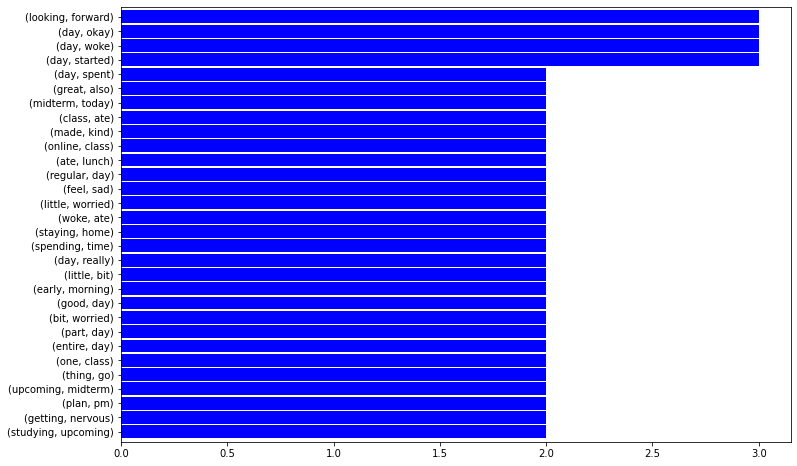

In [ ]:
bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [ ]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(datasentiment['Text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(59, 1206)
['ability eat', 'able every', 'able sleep', 'acceptance every', 'ache that', 'actually cant', 'actually loneliness', 'added pressure', 'advisory council', 'affect mood', 'afraid couldnt', 'afternoon time', 'afterwads life', 'almost pm', 'alone hard', 'alot task', 'already feel', 'already stressful', 'alright im', 'also didnt', 'also excited', 'also group', 'also kinda', 'also less', 'also listened', 'also profs', 'also studying', 'also time', 'also virtual', 'also work', 'also worried', 'although early', 'always bed', 'always happens', 'always indoor', 'amount time', 'ample amount', 'ample rest', 'angry lectures', 'annoyed slightly', 'annoying wanted', 'another class', 'another day', 'another regular', 'another sandwich', 'anxiety made', 'anxious afraid', 'anxious keep', 'anxious many', 'anxious meditated', 'anxious pollution', 'anywhere staying', 'application pretty', 'april omg', 'assignment done', 'assignments however', 'assignments tests', 'assignments week', 'assignment

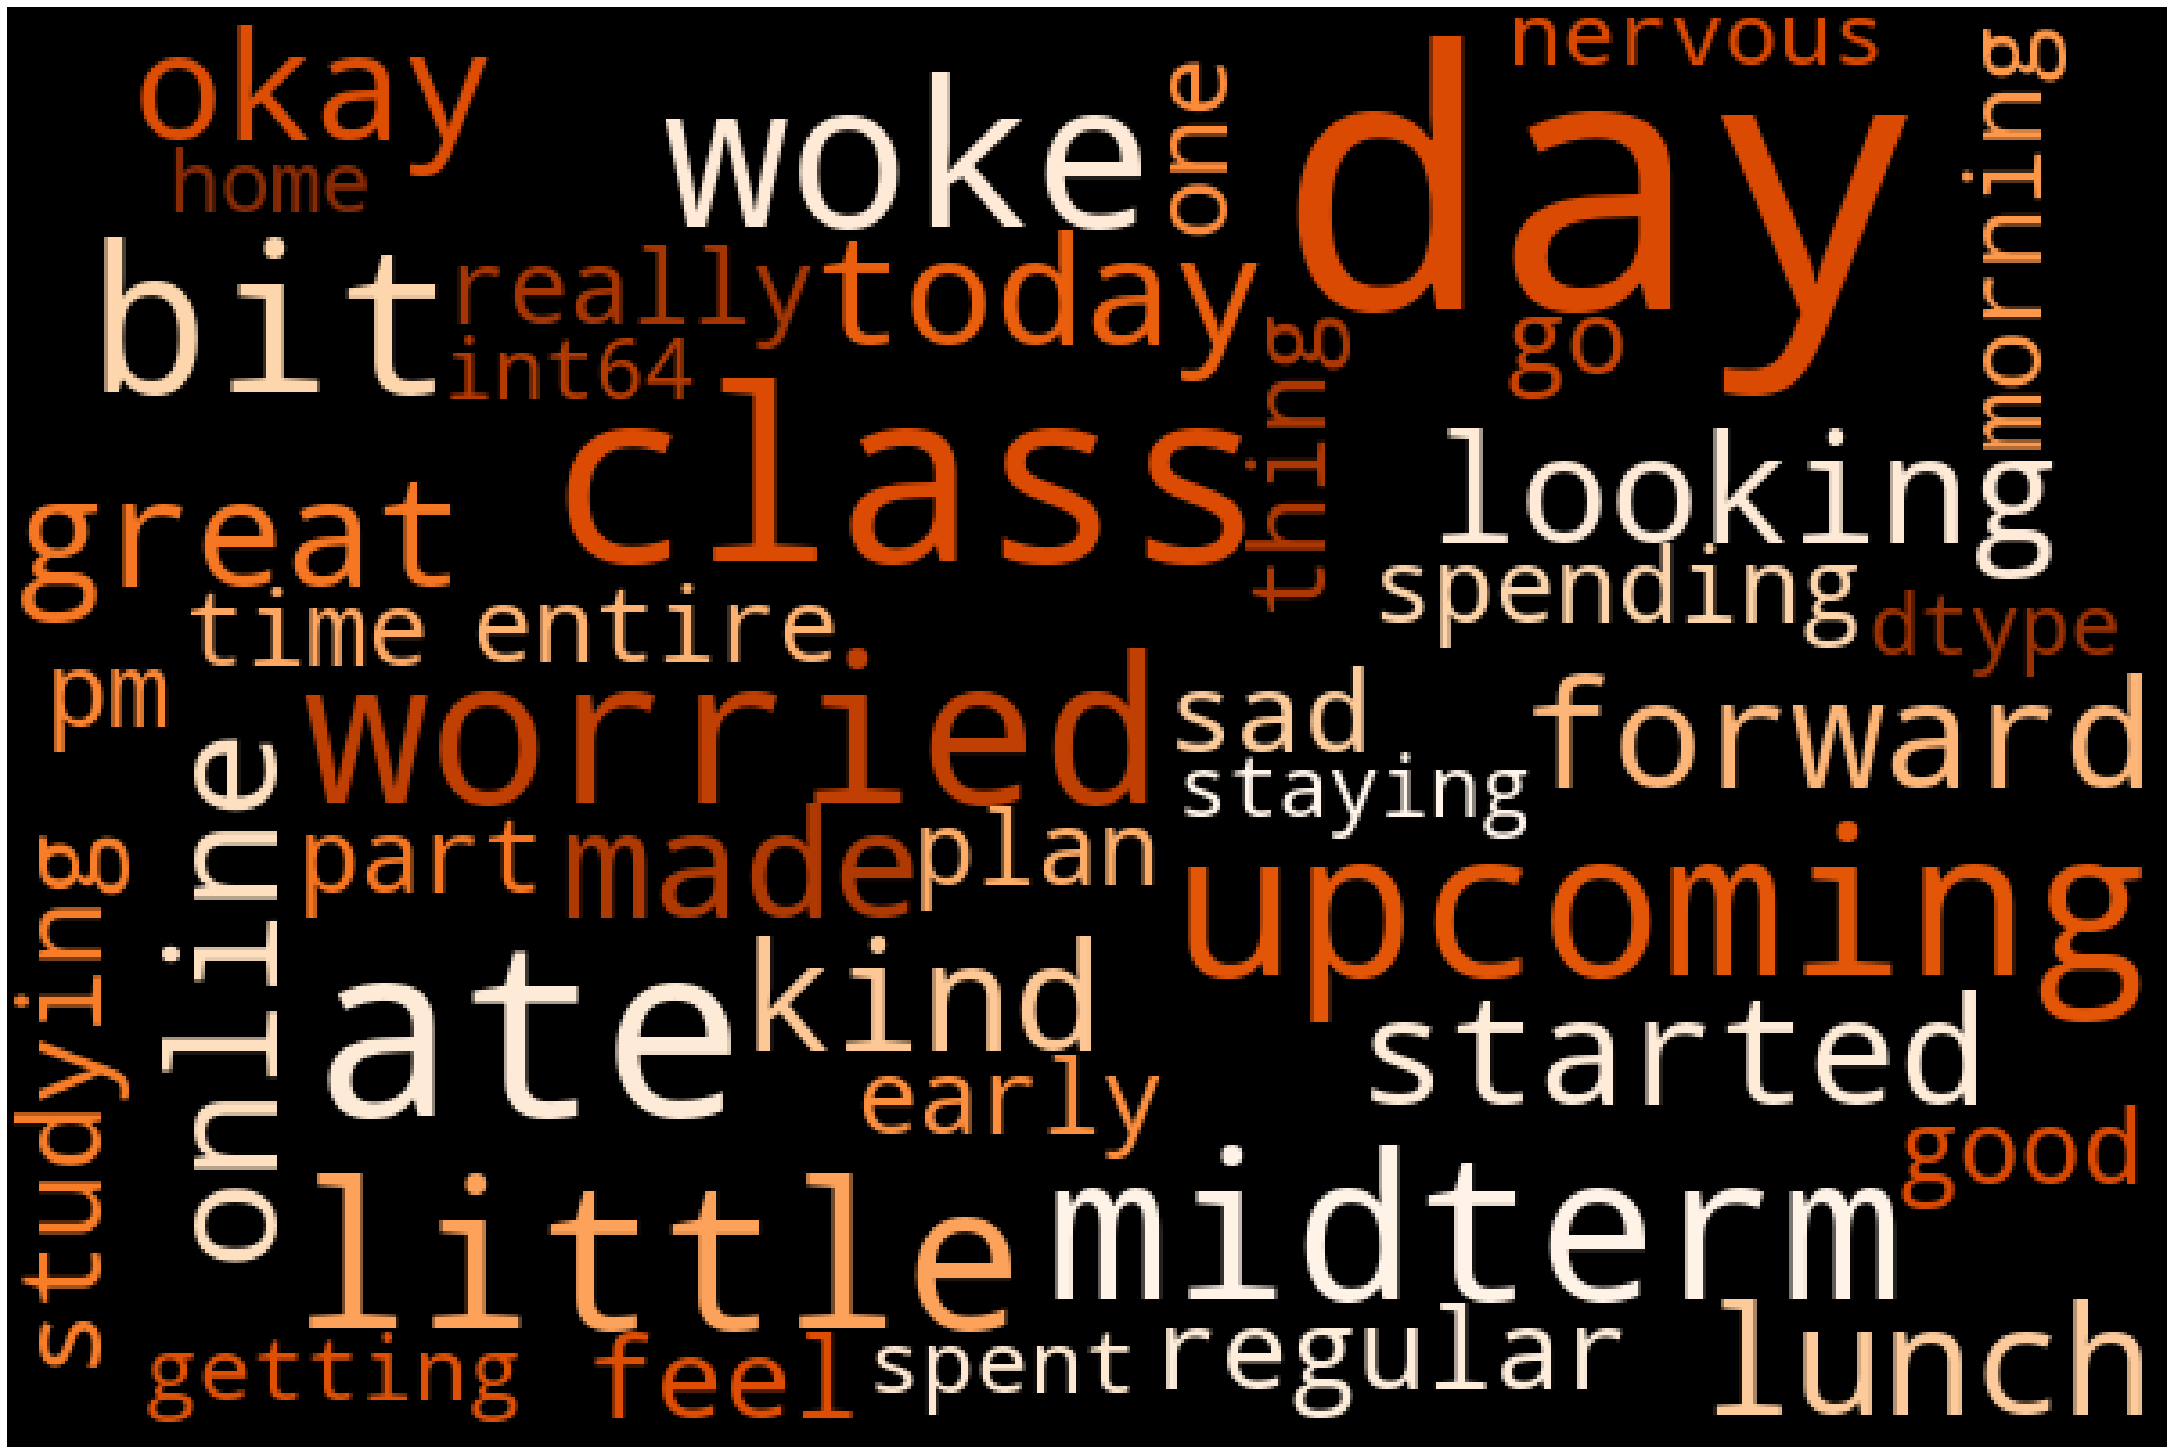

In [ ]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(bigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]

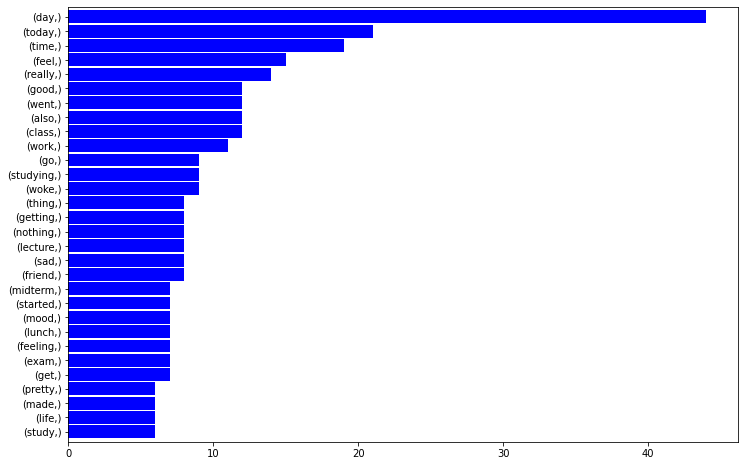

In [ ]:
unigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

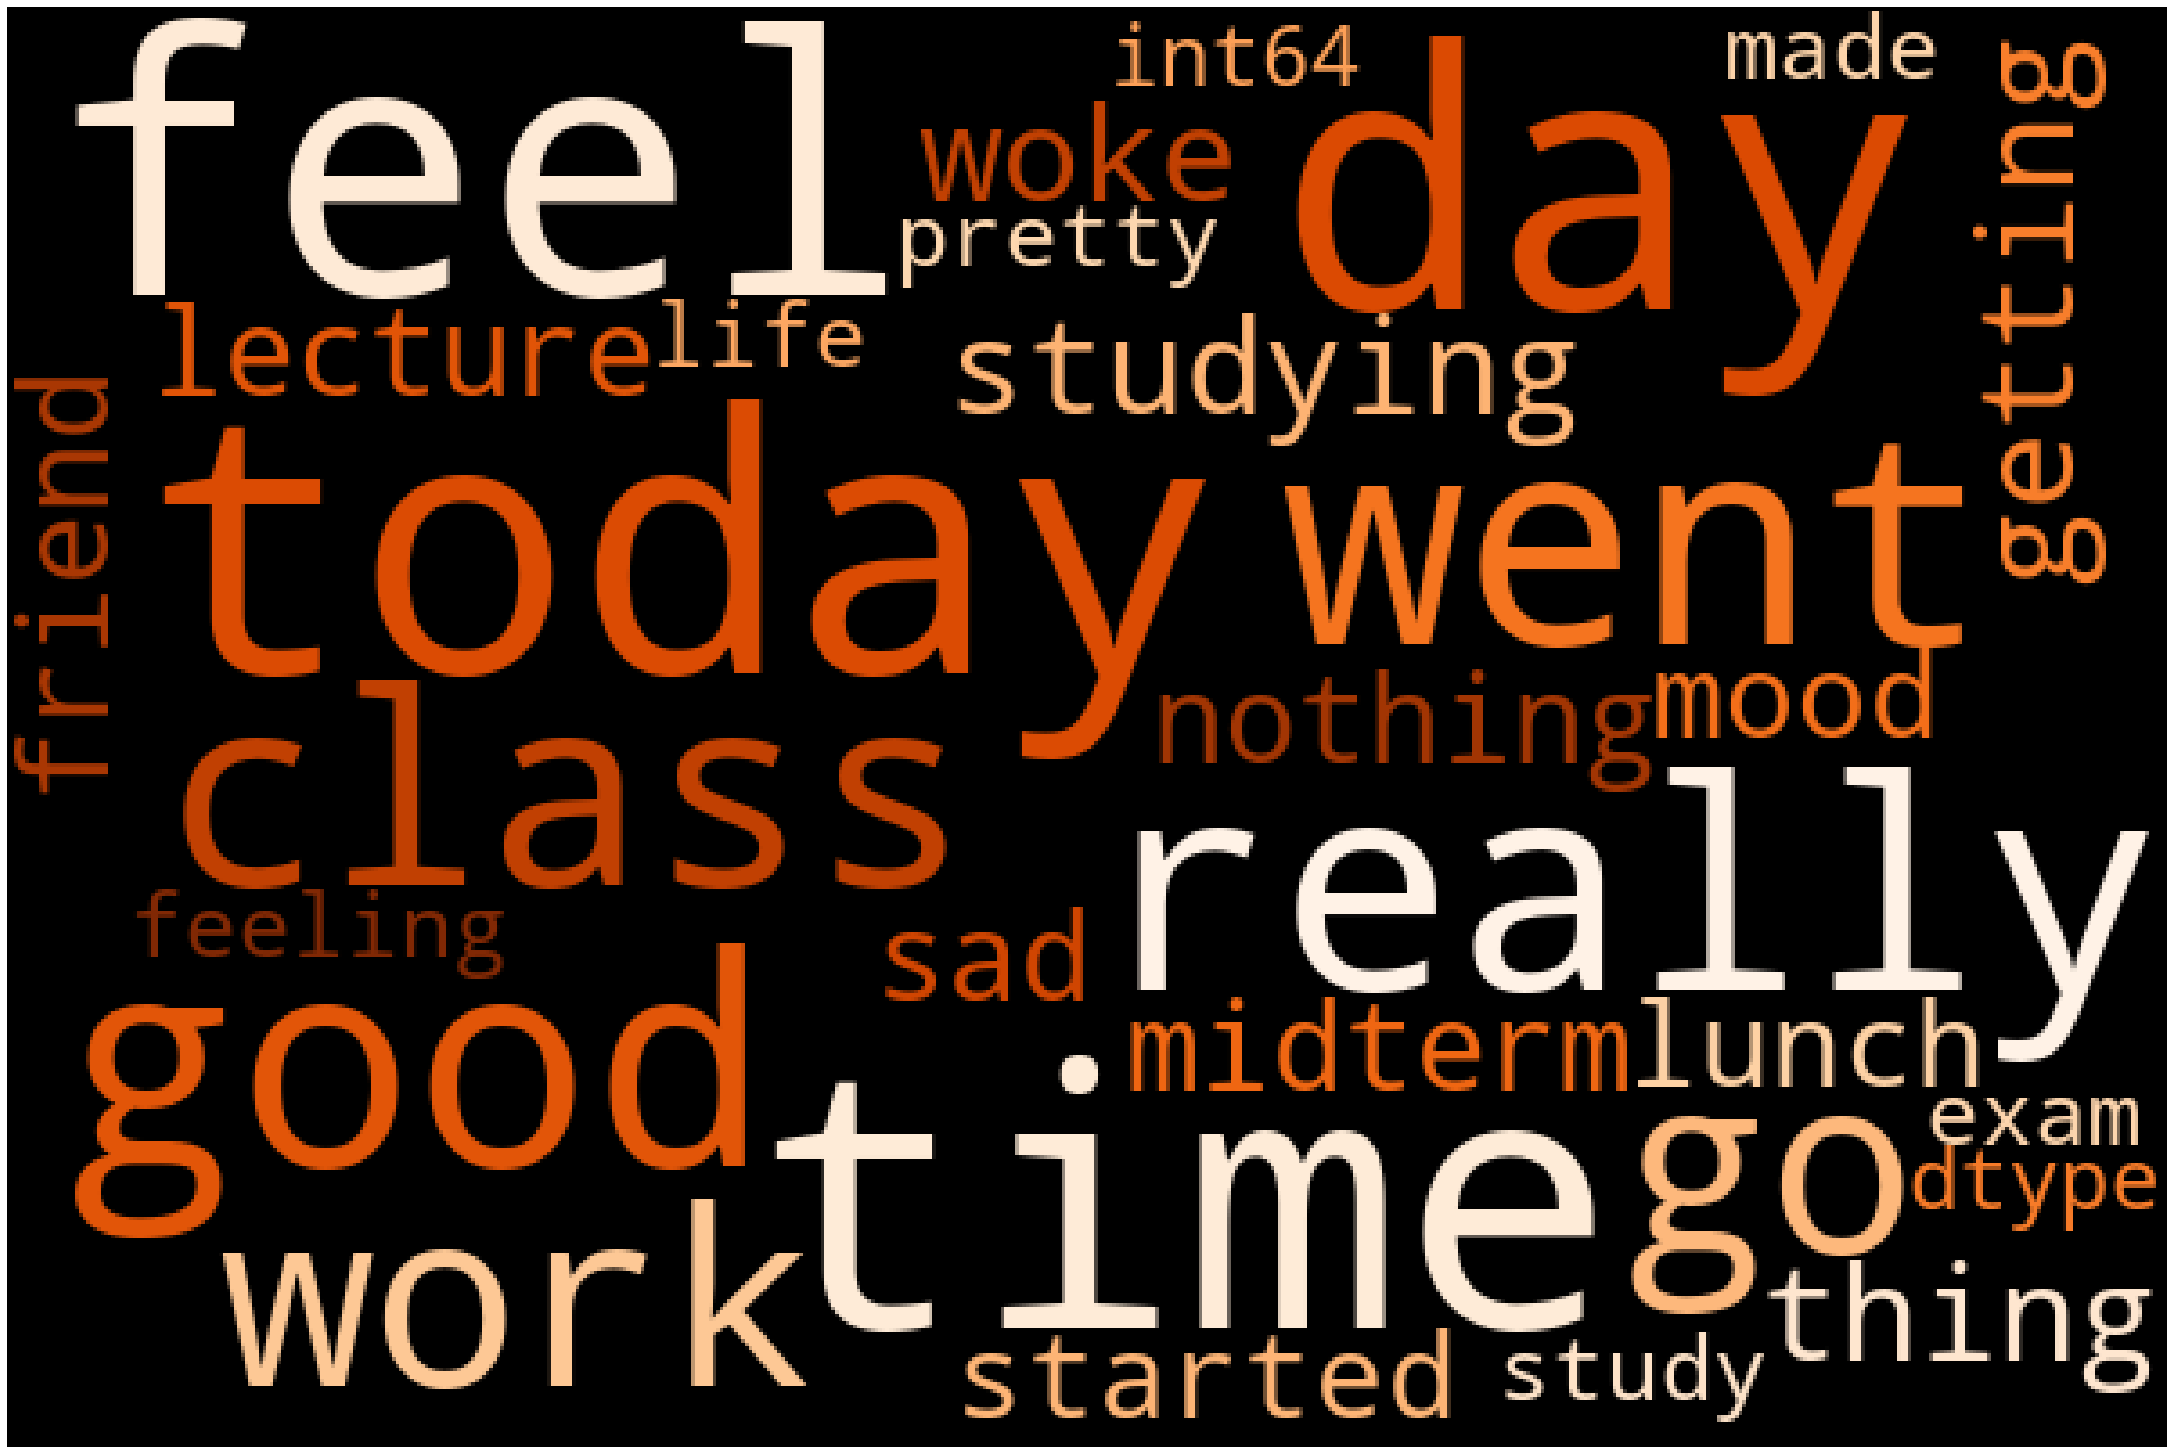

In [ ]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(unigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(datasentiment['Text']).toarray()

# tf_feature_names represents what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [ ]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [ ]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,day,7.1,day,0.1,day,3.1,day,0.1,day,5.1,day,2.1,day,8.1,day,8.6,day,2.6,day,4.1


In [ ]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(datasentiment['Text'])
txt_transformed = txt_fitted.transform(datasentiment['Text'])
print ("The text: ", datasentiment['Text'])

The text:  0                                                                                                                             went sisters yesterday dad came pick early morning cause tuition i’m really sad
1                                                                                                                                       class started one class although early classit really interesting fun
2                                                                                                                                          woke im sure mood today yet hope ill happy think embarrassing past
3                                                                                                                                          exam  days due online classes classes effective stressed give exam
4                                                                                         good far nieces it’s gonna fun throat ache that’s bothering annoying wanted

In [ ]:
ab = tf.vocabulary_
ab

{'ability': 0,
 'able': 1,
 'acceptance': 2,
 'ache': 3,
 'actually': 4,
 'added': 5,
 'advisory': 6,
 'affect': 7,
 'afraid': 8,
 'afternoon': 9,
 'afterwads': 10,
 'almost': 11,
 'alone': 12,
 'alot': 13,
 'already': 14,
 'alright': 15,
 'also': 16,
 'although': 17,
 'always': 18,
 'amazing': 19,
 'amount': 20,
 'ample': 21,
 'angry': 22,
 'annoyed': 23,
 'annoying': 24,
 'another': 25,
 'anxiety': 26,
 'anxious': 27,
 'anywhere': 28,
 'application': 29,
 'april': 30,
 'aspects': 31,
 'assignment': 32,
 'assignments': 33,
 'ate': 34,
 'attend': 35,
 'attendance': 36,
 'attended': 37,
 'away': 38,
 'back': 39,
 'background': 40,
 'bad': 41,
 'barely': 42,
 'became': 43,
 'becomes': 44,
 'becuz': 45,
 'bed': 46,
 'begun': 47,
 'best': 48,
 'better': 49,
 'big': 50,
 'bike': 51,
 'biking': 52,
 'birds': 53,
 'bit': 54,
 'bodyweight': 55,
 'book': 56,
 'boost': 57,
 'bored': 58,
 'boring': 59,
 'bothering': 60,
 'bought': 61,
 'boyfriend': 62,
 'break': 63,
 'breakfast': 64,
 'brings': 6

In [ ]:
freq={}
for word in words:
    count=freq.get(word,0)
    freq[word]=count + 1

In [ ]:
frequency_list = freq.keys()

In [ ]:
for words in frequency_list:
    print(words + ' -> ' + str(freq[words]))

went -> 12
sister -> 1
yesterday -> 5
dad -> 2
came -> 4
pick -> 1
early -> 4
morning -> 6
cause -> 3
tuition -> 1
really -> 14
sad -> 8
class -> 12
started -> 7
one -> 5
although -> 1
classit -> 1
interesting -> 3
fun -> 4
woke -> 9
sure -> 2
mood -> 7
today -> 21
yet -> 3
hope -> 3
ill -> 1
happy -> 5
think -> 3
embarrassing -> 1
past -> 1
exam -> 7
day -> 44
due -> 6
online -> 2
effective -> 1
stressed -> 2
give -> 1
good -> 12
far -> 3
niece -> 2
gonna -> 1
throat -> 2
ache -> 1
thats -> 1
bothering -> 1
annoying -> 1
wanted -> 3
spend -> 1
time -> 19
considering -> 1
week -> 5
feeling -> 7
productive -> 3
many -> 5
work -> 11
piling -> 1
couple -> 1
wasnt -> 1
got -> 5
feel -> 15
great -> 4
also -> 12
didnt -> 4
procrastinate -> 2
much -> 4
nice -> 4
alot -> 1
task -> 2
perform -> 1
energized -> 1
complete -> 1
long -> 4
writing -> 1
amazing -> 1
nothing -> 8
special -> 4
quite -> 4
sunny -> 3
monday -> 1
plan -> 4
buy -> 1
schedule -> 1
book -> 1
organize -> 1
better -> 3
planned

In [ ]:
results = []

In [ ]:
for word in frequency_list:
    tuple = (word, freq[word])
    results.append(tuple)

In [ ]:
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

In [ ]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:30]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

day 44
today 21
time 19
feel 15
really 14
went 12
class 12
good 12
also 12
work 11
woke 9
studying 9
go 9
sad 8
nothing 8
friend 8
getting 8
thing 8
lecture 8
started 7
mood 7
exam 7
feeling 7
get 7
midterm 7
lunch 7
morning 6
due 6
pretty 6
spent 6


In [ ]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:10]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

day 44
today 21
time 19
feel 15
really 14
went 12
class 12
good 12
also 12
work 11


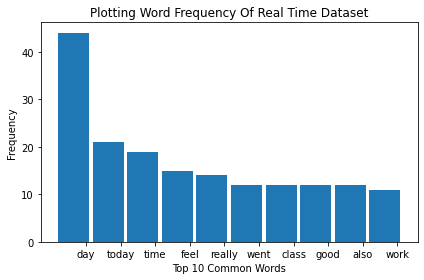

In [ ]:
# Plotting histogram 
plt.xlabel('Top 10 Common Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency Of Real Time Dataset')
indexes = np.arange(len(words_names) )
width = 0.9
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * 0.4, words_names)
plt.tight_layout()
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(str(datasentiment['Text']))

In [ ]:
#loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 0.9981, neg: 0.15, neu: 0.643, pos: 0.208, 

In [ ]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [ ]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
datasentiment['Text'] = datasentiment['Text'].apply(tokenize)
datasentiment.head()

,Timestamp,How old are you?,What is your gender?,What is your occupation?,How are you feeling today?,Text,Which activity would make your day better?
0,2021/03/28 9:47:00 pm GMT-6,12-17 years old,Female,Student,Bored,"[went, sisters, yesterday, dad, came, pick, early, morning, cause, tuition, i, ’, m, really, sad]",go to my sisters house
1,2021/03/28 9:47:28 pm GMT-6,18-24 years old,Female,Student,Happy,"[class, started, one, class, although, early, classit, really, interesting, fun]",Listen to music
2,2021/03/28 9:53:56 pm GMT-6,18-24 years old,Male,Student,Bored,"[woke, im, sure, mood, today, yet, hope, ill, happy, think, embarrassing, past]",Hitting the gym
3,2021/03/28 9:54:58 pm GMT-6,18-24 years old,Male,Student,Stressed 😥,"[exam, days, due, online, classes, classes, effective, stressed, give, exam]",Someone plz help for my exam
4,2021/03/28 9:55:59 pm GMT-6,18-24 years old,Female,Employed for wages,Happy,"[good, far, nieces, it, ’, s, gon, na, fun, throat, ache, that, ’, s, bothering, annoying, wanted, spend, good, time, nieces, considering, week]",Listen to music


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(datasentiment['Text'])
# Create Corpus
texts = datasentiment['Text']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"time" + 0.021*"day" + 0.016*"sad" + 0.015*"plan" + 0.013*"something" '
  '+ 0.013*"quite" + 0.013*"feel" + 0.012*"relax" + 0.012*"today" + '
  '0.011*"also"'),
 (1,
  '0.027*"studying" + 0.016*"got" + 0.015*"wanted" + 0.014*"also" + '
  '0.013*"today" + 0.012*"mall" + 0.009*"great" + 0.009*"discount" + '
  '0.009*"kinda" + 0.009*"dont"'),
 (2,
  '0.028*"went" + 0.025*"homework" + 0.020*"day" + 0.017*"took" + 0.017*"week" '
  '+ 0.017*"ate" + 0.017*"another" + 0.017*"many" + 0.017*"class" + '
  '0.017*"sandwich"'),
 (3,
  '0.028*"i" + 0.025*"’" + 0.021*"m" + 0.020*"day" + 0.020*"feeling" + '
  '0.020*"pretty" + 0.020*"work" + 0.020*"feels" + 0.015*"woke" + '
  '0.014*"also"'),
 (4,
  '0.032*"day" + 0.021*"today" + 0.016*"lectures" + 0.016*"afterwads" + '
  '0.016*"going" + 0.016*"life" + 0.016*"okay" + 0.016*"another" + '
  '0.016*"nothing" + 0.016*"great"'),
 (5,
  '0.021*"coming" + 0.021*"papers" + 0.021*"task" + 0.021*"dont" + '
  '0.021*"feel" + 0.021*"time" + 0.021*"

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('E:\implementation\ldavis_prepared_'+str(num_topics))

<input>:2: DeprecationWarning: invalid escape sequence \i
<ipython-input-88-1a291a788d00>:2: DeprecationWarning: invalid escape sequence \i
  LDAvis_data_filepath = os.path.join('E:\implementation\ldavis_prepared_'+str(num_topics))


In [ ]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)


In [ ]:
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'E:\implementation\ldavis_prepared_'+str(num_topics) +'.html')

<input>:1: DeprecationWarning: invalid escape sequence \i
<ipython-input-92-f27b806efbcc>:1: DeprecationWarning: invalid escape sequence \i
  pyLDAvis.save_html(LDAvis_prepared, 'E:\implementation\ldavis_prepared_'+str(num_topics) +'.html')


In [ ]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.064114  0.021395       1        1  11.284922
11     0.061873  0.051336       2        1   8.834788
10    -0.212431 -0.041527       3        1   8.783016
15    -0.067862 -0.010533       4        1   7.667206
9      0.069568  0.037042       5        1   6.630189
0      0.050492  0.032715       6        1   6.483172
14     0.014709 -0.014020       7        1   6.203634
3     -0.062237 -0.004252       8        1   6.174302
8      0.026718  0.080243       9        1   5.522781
2      0.028129 -0.177095      10        1   5.347297
5     -0.042527  0.108526      11        1   4.834234
7     -0.095272  0.093088      12        1   4.470150
1      0.013353 -0.078741      13        1   4.013942
19     0.040087  0.042035      14        1   3.415787
16     0.081402 -0.052879      15        1   2.781223
17    -0.026696 -0.047146      16        1   2.673037
4     -0.005438 -0.007472      17        1   1.782892
12    -0.001808 -0.039191      18        1   1.402796
13     0.041826  0.005456      19        1   0.884207
18     0.022000  0.001019      20        1   0.810423, topic_info=         Term       Freq      Total Category  logprob  loglift
31      today  13.000000  13.000000  Default  30.0000  30.0000
77        day  27.000000  27.000000  Default  29.0000  29.0000
8      really  10.000000  10.000000  Default  28.0000  28.0000
130  studying   6.000000   6.000000  Default  27.0000  27.0000
12       went   8.000000   8.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
68       nice   0.031517   3.417403  Topic20  -5.8445   0.1293
395       lot   0.033502   4.768212  Topic20  -5.7834  -0.1428
438  listened   0.028152   2.036269  Topic20  -5.9574   0.5341
4           i   0.032145   7.469708  Topic20  -5.8248  -0.6330
8      really   0.031273  10.794504  Topic20  -5.8523  -1.0287

[921 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
198       7  0.696982  acceptance
271       1  0.403214    actually
271      12  0.403214    actually
482      11  0.758965       added
624       9  0.805079      afraid
...     ...       ...         ...
14        7  0.083238           ’
14        8  0.166475           ’
14        9  0.083238           ’
14       12  0.083238           ’
335      14  0.869160           😂

[759 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 12, 11, 16, 10, 1, 15, 4, 9, 3, 6, 8, 2, 20, 17, 18, 5, 13, 14, 19])